In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [6]:
data = pd.read_csv("dataset.csv")
data

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


##**`Exercise 2`**

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
class LogisticRegressionLR:
    def __init__(self):
        pass
        
    def fit(self, X, Y):
        '''Fit the logistic regression model
        X: A matrix whose columns are the independent variables
        Y: A/an matrix/array, which is the dependent variable
        '''
        # Add an only-ones-column to X
        self._original_X = X
        self._X = np.insert(X, 0, [1] * X.shape[0], axis = 1)
        
        # Reshape Y to the right shape
        self._Y = np.array(Y).reshape(-1, 1)
        
        # Find W using gradient descent
            # Initial W, lr (alpha), epsilon
        learning_rate = 0.01
        self._W = np.transpose(np.matrix(np.zeros(self._X.shape[1])))
        iterations = 1000
       
        for i in range(1, iterations):
            # Calculate gradient at each step
            y_hat =  sigmoid(np.matmul(self._X, self._W))
            grad = np.matmul(np.transpose(self._X), (y_hat - self._Y))

            # Update W
            self._W = self._W - learning_rate * grad

        return self._W
    
    def coef(self):
        "Return the coefficients (matrix W)"
        return self._W

    def plot_model(self):
        "Plot model only for logistic regression"
        # Scatter each data point
        plt.scatter(np.array(self._original_X[:10, 0]), np.array(self._original_X[:10, 1]), c='green', edgecolors='none', s=30, label='Accept loan')
        plt.scatter(np.array(self._original_X[10:, 0]), np.array(self._original_X[10:, 1]), c='red', edgecolors='none', s=30, label='Reject loan')
        plt.legend(loc=1)
        plt.xlabel('Salary')
        plt.ylabel('Experience')

        # Draw boundary line
        t = 0.5
        x1_min, x1_max = np.min(self._original_X[:, 0]), np.max(self._original_X[:, 0])
        y_min = float(-(self._W[0,:]+x1_min*self._W[1,:]+ np.log(1/t-1))/self._W[2,:])
        y_max = float(-(self._W[0,:] + x1_max*self._W[1,:]+ np.log(1/t-1))/self._W[2,:])
        plt.plot((x1_min, x1_max),(y_min, y_max), 'b')
        
        plt.show()
    
    def predict(self, new_X):
        """Predict new value
        new_X: A new matrix of X to predict new Y"""
        
        # Add an only-ones-column to X
        new_X = np.insert(new_X, 0, [1] * new_X.shape[0], axis = 1)
        xTw = np.matmul(new_X, self._W)
        if sigmoid(xTw) > 0.5:
            return 1
        else:
            return 0
    

In [8]:
X = np.transpose(np.matrix((data['Lương'], data["Thời gian làm việc"])))
X

matrix([[10.  ,  1.  ],
        [ 5.  ,  2.  ],
        [ 6.  ,  1.8 ],
        [ 7.  ,  1.  ],
        [ 8.  ,  2.  ],
        [ 9.  ,  0.5 ],
        [ 4.  ,  3.  ],
        [ 5.  ,  2.5 ],
        [ 8.  ,  1.  ],
        [ 4.  ,  2.5 ],
        [ 8.  ,  0.1 ],
        [ 7.  ,  0.15],
        [ 4.  ,  1.  ],
        [ 5.  ,  0.8 ],
        [ 7.  ,  0.3 ],
        [ 4.  ,  1.  ],
        [ 5.  ,  0.5 ],
        [ 6.  ,  0.3 ],
        [ 7.  ,  0.2 ],
        [ 8.  ,  0.15]])

In [9]:
X[:10, 0]

matrix([[10.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [ 4.],
        [ 5.],
        [ 8.],
        [ 4.]])

In [10]:
X.shape

(20, 2)

In [11]:
Y = np.array(data["Cho vay"]).reshape(-1, 1)
Y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [12]:
Y.shape

(20, 1)

##**`Exercise 3`**

In [14]:
LR = LogisticRegressionLR()

In [15]:
LR.fit(X, Y)

matrix([[-7.24766613],
        [ 0.62873377],
        [ 3.64069858]])

##**`Exercise 4`**

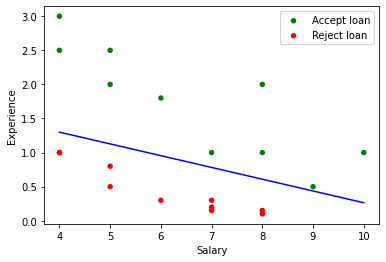

In [16]:
LR.plot_model()

In [17]:
LR.predict(np.matrix([10, 0.5]))

1

In [18]:
LR.predict(np.matrix([7, 1.5]))

1

In [19]:
LR.predict(np.matrix([6, 0.5]))

0